이 코드는 '케라스 창시자에게 배우는 딥러닝' 교재에서 참고하였습니다.

In [1]:
# 보스턴 주택 데이터셋 로드하기

from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [5]:
import numpy as np

np.max(train_targets) # 최대 가격은 5만 달러!

50.0

In [6]:
# 데이터 정규화하기

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [7]:
# 모델 정의하기

from keras import models
from keras import layers

def build_model() :
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape = (train_data.shape[1], )))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
  return model

전체의 데이터를 k(4)개로 나누어서 각 부분마다 모델을 만들고 학습을 시행한다. 

In [8]:
# 각 폴드에서 검증 점수를 로그에 저장하기

k = 4

num_val_samples = len(train_data) // k
num_epochs = 100
all_loss_histories = []
all_mae_histories = []
all_val_loss_histories = []
all_val_mae_histories = []
for i in range(k) :
      print("처리 중인 폴드 #", i)
      val_data = train_data[ i * num_val_samples : (i+1) * num_val_samples]
      val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]
    # 학습 데이터 새로 생성
      partial_train_data = np.concatenate([train_data[: i * num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
      partial_train_targets = np.concatenate([train_targets[: i * num_val_samples], train_targets[(i+1)*num_val_samples:]], axis=0)
    # 각 폴더마다 모델을 생성하고 그 mae 값을 리스트에 저장
      model = build_model()
      history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose =1, validation_data=(val_data, val_targets))
    # 각 폴더에 대한 mae 값을 저장
      loss_history = history.history['loss']
      mae_history = history.history['mean_absolute_error']
      val_loss_history = history.history['val_loss']
      val_mae_history = history.history['val_mean_absolute_error']
    
      all_val_mae_histories.append(val_mae_history)
      all_loss_histories.append(loss_history)
      all_mae_histories.append(mae_history)
      all_val_loss_histories.append(val_loss_history)


처리 중인 폴드 # 0
Epoch 1/100
303/303 [==============================] - 36s 6ms/step - loss: 319.6714 - mean_absolute_error: 15.5775 - val_loss: 32.8308 - val_mean_absolute_error: 3.7732
Epoch 2/100
303/303 [==============================] - 1s 2ms/step - loss: 32.1736 - mean_absolute_error: 3.9873 - val_loss: 21.5131 - val_mean_absolute_error: 3.0607
Epoch 3/100
303/303 [==============================] - 1s 2ms/step - loss: 21.0105 - mean_absolute_error: 3.0390 - val_loss: 16.4686 - val_mean_absolute_error: 2.8346
Epoch 4/100
303/303 [==============================] - 1s 2ms/step - loss: 21.0004 - mean_absolute_error: 2.7682 - val_loss: 16.7866 - val_mean_absolute_error: 3.1102
Epoch 5/100
303/303 [==============================] - 1s 2ms/step - loss: 12.6447 - mean_absolute_error: 2.6359 - val_loss: 13.5995 - val_mean_absolute_error: 2.5335
Epoch 6/100
303/303 [==============================] - 1s 2ms/step - loss: 13.3382 - mean_absolute_error: 2.6450 - val_loss: 13.7306 - val_mean_absol

303/303 [==============================] - 1s 3ms/step - loss: 5.5001 - mean_absolute_error: 1.6830 - val_loss: 8.3489 - val_mean_absolute_error: 2.2615
Epoch 51/100
303/303 [==============================] - 0s 2ms/step - loss: 7.8342 - mean_absolute_error: 1.8395 - val_loss: 8.0422 - val_mean_absolute_error: 2.0026
Epoch 52/100
303/303 [==============================] - 0s 2ms/step - loss: 5.9929 - mean_absolute_error: 1.6452 - val_loss: 7.3839 - val_mean_absolute_error: 1.9380
Epoch 53/100
303/303 [==============================] - 1s 2ms/step - loss: 8.2209 - mean_absolute_error: 1.7993 - val_loss: 7.5762 - val_mean_absolute_error: 1.9029
Epoch 54/100
303/303 [==============================] - 1s 2ms/step - loss: 5.3848 - mean_absolute_error: 1.5640 - val_loss: 8.0976 - val_mean_absolute_error: 2.1421
Epoch 55/100
303/303 [==============================] - 0s 2ms/step - loss: 5.5696 - mean_absolute_error: 1.5203 - val_loss: 8.3309 - val_mean_absolute_error: 2.2247
Epoch 56/100
303/

303/303 [==============================] - 1s 2ms/step - loss: 4.9933 - mean_absolute_error: 1.5332 - val_loss: 10.7141 - val_mean_absolute_error: 2.3545
Epoch 100/100
303/303 [==============================] - 1s 2ms/step - loss: 3.7140 - mean_absolute_error: 1.2656 - val_loss: 8.9378 - val_mean_absolute_error: 2.0967
처리 중인 폴드 # 1
Epoch 1/100
303/303 [==============================] - 3s 3ms/step - loss: 419.8121 - mean_absolute_error: 17.3083 - val_loss: 28.1168 - val_mean_absolute_error: 4.0128
Epoch 2/100
303/303 [==============================] - 1s 2ms/step - loss: 30.9735 - mean_absolute_error: 3.9207 - val_loss: 18.3332 - val_mean_absolute_error: 3.2188
Epoch 3/100
303/303 [==============================] - 0s 2ms/step - loss: 21.2302 - mean_absolute_error: 3.1393 - val_loss: 15.2451 - val_mean_absolute_error: 2.8125
Epoch 4/100
303/303 [==============================] - 0s 2ms/step - loss: 22.2042 - mean_absolute_error: 2.9741 - val_loss: 12.3554 - val_mean_absolute_error: 2.5

303/303 [==============================] - 0s 2ms/step - loss: 5.9002 - mean_absolute_error: 1.6475 - val_loss: 8.9664 - val_mean_absolute_error: 2.2971
Epoch 49/100
303/303 [==============================] - 1s 2ms/step - loss: 7.5708 - mean_absolute_error: 1.6108 - val_loss: 7.4578 - val_mean_absolute_error: 2.1137
Epoch 50/100
303/303 [==============================] - 0s 1ms/step - loss: 6.7013 - mean_absolute_error: 1.6453 - val_loss: 7.9409 - val_mean_absolute_error: 2.1694
Epoch 51/100
303/303 [==============================] - 0s 2ms/step - loss: 6.0613 - mean_absolute_error: 1.4617 - val_loss: 7.9620 - val_mean_absolute_error: 2.1636
Epoch 52/100
303/303 [==============================] - 1s 2ms/step - loss: 5.9842 - mean_absolute_error: 1.6006 - val_loss: 8.2630 - val_mean_absolute_error: 2.1669
Epoch 53/100
303/303 [==============================] - 1s 2ms/step - loss: 11.9041 - mean_absolute_error: 1.8592 - val_loss: 9.7109 - val_mean_absolute_error: 2.4403
Epoch 54/100
303

303/303 [==============================] - 0s 1ms/step - loss: 2.8620 - mean_absolute_error: 1.1514 - val_loss: 9.5892 - val_mean_absolute_error: 2.3542
Epoch 98/100
303/303 [==============================] - 0s 1ms/step - loss: 2.7039 - mean_absolute_error: 1.1875 - val_loss: 8.3385 - val_mean_absolute_error: 2.2414
Epoch 99/100
303/303 [==============================] - 0s 1ms/step - loss: 2.0601 - mean_absolute_error: 1.0314 - val_loss: 12.0020 - val_mean_absolute_error: 2.5836
Epoch 100/100
303/303 [==============================] - 0s 1ms/step - loss: 3.6012 - mean_absolute_error: 1.1736 - val_loss: 8.4635 - val_mean_absolute_error: 2.2394
처리 중인 폴드 # 2
Epoch 1/100
303/303 [==============================] - 2s 2ms/step - loss: 406.3903 - mean_absolute_error: 16.7146 - val_loss: 44.4843 - val_mean_absolute_error: 4.7383
Epoch 2/100
303/303 [==============================] - 0s 1ms/step - loss: 41.5265 - mean_absolute_error: 4.4747 - val_loss: 30.1835 - val_mean_absolute_error: 3.813

Epoch 46/100
303/303 [==============================] - 0s 1ms/step - loss: 4.7953 - mean_absolute_error: 1.5722 - val_loss: 17.3379 - val_mean_absolute_error: 2.8441
Epoch 47/100
303/303 [==============================] - 0s 1ms/step - loss: 3.2587 - mean_absolute_error: 1.3388 - val_loss: 15.0547 - val_mean_absolute_error: 2.5894
Epoch 48/100
303/303 [==============================] - 0s 1ms/step - loss: 4.6403 - mean_absolute_error: 1.5078 - val_loss: 14.8174 - val_mean_absolute_error: 2.5236
Epoch 49/100
303/303 [==============================] - 0s 1ms/step - loss: 4.8599 - mean_absolute_error: 1.5186 - val_loss: 16.4545 - val_mean_absolute_error: 2.5058
Epoch 50/100
303/303 [==============================] - 0s 2ms/step - loss: 5.4735 - mean_absolute_error: 1.5700 - val_loss: 16.4162 - val_mean_absolute_error: 2.6555
Epoch 51/100
303/303 [==============================] - 0s 1ms/step - loss: 4.2955 - mean_absolute_error: 1.4304 - val_loss: 19.7575 - val_mean_absolute_error: 3.082

303/303 [==============================] - 0s 1ms/step - loss: 2.5785 - mean_absolute_error: 1.2130 - val_loss: 18.5484 - val_mean_absolute_error: 2.7951
Epoch 96/100
303/303 [==============================] - 0s 1ms/step - loss: 2.8094 - mean_absolute_error: 1.2335 - val_loss: 16.1900 - val_mean_absolute_error: 2.5805
Epoch 97/100
303/303 [==============================] - 0s 1ms/step - loss: 2.5349 - mean_absolute_error: 1.1548 - val_loss: 16.1939 - val_mean_absolute_error: 2.6576
Epoch 98/100
303/303 [==============================] - 0s 1ms/step - loss: 2.8046 - mean_absolute_error: 1.2376 - val_loss: 15.7314 - val_mean_absolute_error: 2.6436
Epoch 99/100
303/303 [==============================] - 0s 1ms/step - loss: 2.6621 - mean_absolute_error: 1.2190 - val_loss: 17.5098 - val_mean_absolute_error: 2.7870
Epoch 100/100
303/303 [==============================] - 0s 1ms/step - loss: 2.7568 - mean_absolute_error: 1.2958 - val_loss: 13.3657 - val_mean_absolute_error: 2.3119
처리 중인 폴드 #

303/303 [==============================] - 0s 1ms/step - loss: 11.1904 - mean_absolute_error: 1.8843 - val_loss: 12.1898 - val_mean_absolute_error: 2.4059
Epoch 45/100
303/303 [==============================] - 0s 1ms/step - loss: 4.5331 - mean_absolute_error: 1.3711 - val_loss: 14.6679 - val_mean_absolute_error: 2.7634
Epoch 46/100
303/303 [==============================] - 0s 1ms/step - loss: 6.0105 - mean_absolute_error: 1.7179 - val_loss: 12.7015 - val_mean_absolute_error: 2.4727
Epoch 47/100
303/303 [==============================] - 0s 1ms/step - loss: 4.5886 - mean_absolute_error: 1.5024 - val_loss: 11.9562 - val_mean_absolute_error: 2.4231
Epoch 48/100
303/303 [==============================] - 0s 1ms/step - loss: 7.3875 - mean_absolute_error: 1.6594 - val_loss: 12.7800 - val_mean_absolute_error: 2.4370
Epoch 49/100
303/303 [==============================] - 0s 1ms/step - loss: 6.2758 - mean_absolute_error: 1.5838 - val_loss: 12.4903 - val_mean_absolute_error: 2.4603
Epoch 50/1

303/303 [==============================] - 1s 2ms/step - loss: 4.1891 - mean_absolute_error: 1.1945 - val_loss: 12.9162 - val_mean_absolute_error: 2.5872
Epoch 94/100
303/303 [==============================] - 1s 2ms/step - loss: 6.3373 - mean_absolute_error: 1.4664 - val_loss: 12.8532 - val_mean_absolute_error: 2.6234
Epoch 95/100
303/303 [==============================] - 0s 1ms/step - loss: 3.4604 - mean_absolute_error: 1.2139 - val_loss: 12.5507 - val_mean_absolute_error: 2.5286
Epoch 96/100
303/303 [==============================] - 0s 1ms/step - loss: 4.4504 - mean_absolute_error: 1.2664 - val_loss: 14.7271 - val_mean_absolute_error: 2.8920
Epoch 97/100
303/303 [==============================] - 0s 2ms/step - loss: 3.3639 - mean_absolute_error: 1.2105 - val_loss: 15.0445 - val_mean_absolute_error: 2.8154
Epoch 98/100
303/303 [==============================] - 1s 2ms/step - loss: 4.1157 - mean_absolute_error: 1.3697 - val_loss: 13.1370 - val_mean_absolute_error: 2.6324
Epoch 99/10

In [9]:
# k-겹 검증 점수 평균을 기록하기
average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_val_mae_history = [np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]

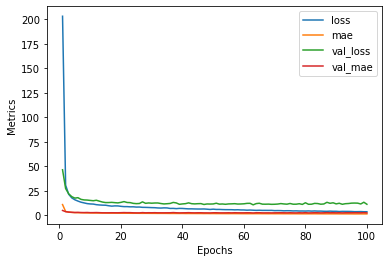

In [10]:
# 검증 점수 그래프 그리기

import matplotlib.pyplot as plt
plt.plot(range(1, len(average_loss_history)+1), average_loss_history, label = 'loss')
plt.plot(range(1, len(average_mae_history)+1), average_mae_history, label = 'mae')
plt.plot(range(1, len(average_val_loss_history)+1), average_val_loss_history, label = 'val_loss')
plt.plot(range(1, len(average_val_mae_history)+1), average_val_mae_history, label = 'val_mae')

plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

같이 그리니깐 알아볼수가 없어서 mae와 val_loss, val_mae는 따로 그려보았습니다.

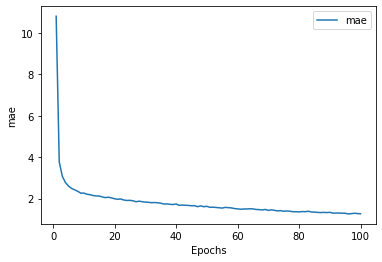

In [11]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history, label = 'mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

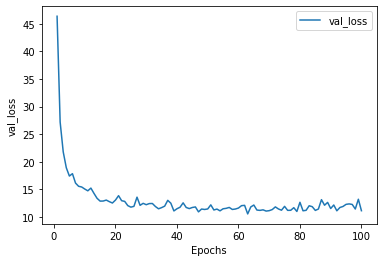

In [15]:
plt.plot(range(1, len(average_val_loss_history)+1), average_val_loss_history, label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('val_loss')
plt.legend()
plt.show()

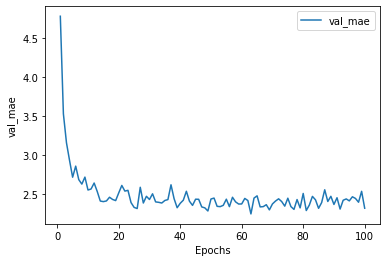

In [16]:
plt.plot(range(1, len(average_val_mae_history)+1), average_val_mae_history, label = 'val_mae')
plt.xlabel('Epochs')
plt.ylabel('val_mae')
plt.legend()
plt.show()